In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [3]:
df = pd.read_csv('dataset/automobile.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


##### I. Descriptive Statistics


In [4]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


<b>I. 1. Numerical Summary</b> <br>

Based on the summary, in the "mean" row, 90% of engines run on gas, and almost 10% on diesel.

In [5]:
df['num-of-doors'].value_counts()

four    115
two      86
Name: num-of-doors, dtype: int64

<b>I. 2. Categorical Summary</b> <br>

The above output, displays that the dataset has 115 with <b> four doors</b> and 86 with <b>two doors</b>

<b>I. 3. Box plots</b> <br>

* Price of eight-cylinder cars lies between 35k to 45k,
while the price of four-cylinder cars lies between 5k to 19k. 
* Average price of five-cylinder cars and six-cylinder cars are almost the same.

Text(0.5, 1.0, '# of Cylinders by Price')

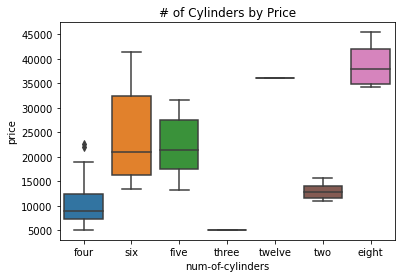

In [32]:
rel = sns.boxplot(x = 'num-of-cylinders', y = 'price', data = df)
rel.set_title("# of Cylinders by Price")

<b>I. 4. Scatter plots</b>


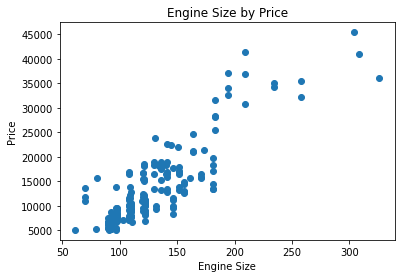

In [33]:
plt.scatter(df['engine-size'], df['price'])
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title('Engine Size by Price')
plt.show()

<b>Observation</b> <br>

Based on the graph, there is a linear relationship between engine size and price. The bigger the engine the costlier is, which is almost true.


<b> I. 5. Histograms </b> <br>

"Histograms" portrays the frequence distribution of a variable. It partitions the spread of numeric data into parts named as "bins", and then counts the number of data points to fall into each <u>bin</u>. Thus, <b> vertical axis actually represents the number of data points in each bin</b>.

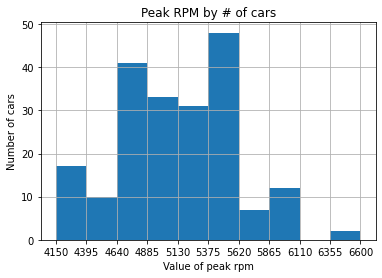

In [34]:
count,bin_edges = np.histogram(df['peak-rpm']) 
df['peak-rpm'].plot(kind = 'hist', xticks = bin_edges)
plt.xlabel('Value of peak rpm')
plt.ylabel('Number of cars')
plt.title('Peak RPM by # of cars')
plt.grid()
plt.show()

<b> Observation </b> <br>

There are 10 cars which have peak rpm between 4395 and 4640, around 42 cars have peak rpm between 4640, and 4885...

##### II. Grouping of Data

In [9]:
df_temp = df[['num-of-doors', 'body-style', 'price']]

df_group = df_temp.groupby(['num-of-doors', 'body-style'], as_index = False).mean()

df_group

,num-of-doors,body-style,price
0,four,hatchback,8372.000000
1,four,sedan,14490.687500
2,four,wagon,12371.960000
3,two,convertible,21890.500000
4,two,hardtop,22208.500000
5,two,hatchback,10230.793103
6,two,sedan,14283.000000


<b> Observation </b> <br>

Through the above output, it's found that "two-door" hardtop, and "two-door" convertibles are the most expensive cars, whereas, four door hatchbacks are the cheapest.

However, a tabe of this form is not very easy to read.
Converting this table  to a <b>pivot table</b> using the <b>pivot()</b> mehod, which would allow the readability in a better fashion.

In [10]:
df_pivot = df_group.pivot(index = 'body-style', columns = 'num-of-doors')
df_pivot

price              
num-of-doors        four           two
body-style                            
convertible          NaN  21890.500000
hardtop              NaN  22208.500000
hatchback      8372.0000  10230.793103
sedan         14490.6875  14283.000000
wagon         12371.9600           NaN

<b> Observation </b> <br>

The price data, now becomes a rectangular grid, which is easier to visualize.

##### III. Handling Missing Values <br>

When no data value is stored for a feature in a particular observation, this feature would be considered as " missing value".
Since such situation is almost always important, it can lead to weak or biased analysis if not treated properly. Therefore, detecting them is really important.

In [11]:
df.isnull()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
199,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<b>Observation</b> </br>

Although it's possible to use this approach to detect missing values, it's not very convenient. Thus, a heatmap could help better visualize them.

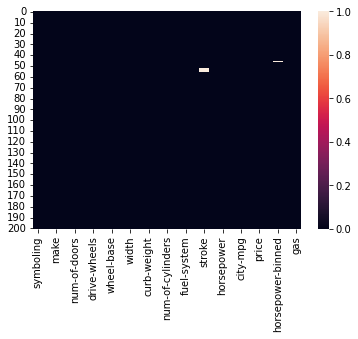

In [36]:
sns.heatmap(df.isnull())
plt.show()

<b>Observation</b> <br>

The output indicates that "stroke" and "horsepower-binned" columns have few missing values. Which can be handled through several ways

* <b> Delete </b> <br>
    * It's possible to delete the rows with the missing values or delete the whole column which has missing values. "Dropna()" can be used from Pandas.
* <b> Impute </b> <br>
    * Some case, where deleting data might cause huge amount of information loss. Therefore, replacing data might be a better option than deleting. One standard replacement rechnique is to replace missing vales with the average value of the entire column. For example, replacing missing values in "stroke" column with the <b>mean</b> value of stroke column. "fillna()", can come in handy in such situation.
* <b> Predictive filling </b> <br>
    * Alternatively, it's possible to fill missing values through predictive filling. The "interpolate()" method will perform a linear interpolation in order to "guess" the missing values and fill the results in the dataset.


##### IV. ANOVA ( Analysis of Variance ) <br>

It is a statistical method which is used for figuring out the relation between different groups of categorical data. The <b> ANOVA </b> test, gives out two measures as a result.

F-test score, which calculates the variation between sample group means divided by variation within a sample group.

P value, which portrays the confidence degree. In other words, it shows whether the obtained result is statistically significant or not.

<b> Observation of "Average price for different manufacturers" </b> <br>

As shown, the average price "Audi", and "Volvo" is almost the same. While the average price of "Jaguar", and "Honda" differ significantly.
In such case, it's allowed to say that there is a very small variance between "Audi", and "Volvo", because their average price is almost the same. While the variance between "Jaguar", and "Honda" is significantly high. 
Using ANOVA method, will find the verification for this hypothesis.

In [25]:
### Anova test using f_oneway
## Comparision of Audi and Volvo

temp_df = df[['make', 'price']].groupby(['make'])
stats.f_oneway(temp_df.get_group('audi')['price'], temp_df.get_group('volvo')['price'])


F_onewayResult(statistic=0.014303241552631388, pvalue=0.9063901597143602)

In [24]:
## Comparision of Honda and Jaguar

stats.f_oneway(temp_df.get_group('jaguar')['price'], temp_df.get_group('honda')['price'])

F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)

<b> Observation </b> <br>

<b> Audi & Volvo </b> <br>

The result confirms what was hypothesised to be true. Since the variance between the price of "audi", and "volvo" is very small; <b>F-Test</b>  was around (0.01) and <b>P Value</b> around (0.9)

<b> Jaguar & Honda </b> <br>

However, in this case, <b>F-Test</b> score was around (401) with a <b>P Value</b> around (1.05 * 10 ^ 10-11) because, the variance between the average price of "Jaguar" and "Honda" is huge.



##### V. Correlation

Correlation is a statistical metric for measuring to what extent different variables are interdependent

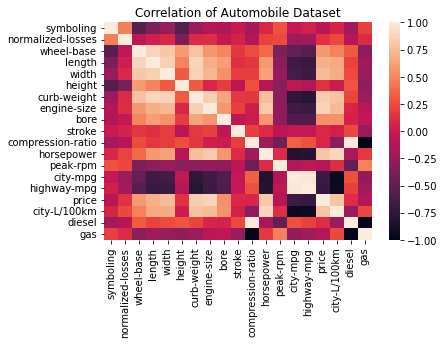

In [38]:
## Finding correlation between different variables

corr_matrix = df.corr()
sns.heatmap(corr_matrix)
plt.title("Correlation of Automobile Dataset")
plt.show()

<b> Observation </b> <br>

Based on the heatmap, the "engine size", and "price" are positively correlated (Score of 0.87) with each other, while, "Hightway-mpg", and "Price" are negatively correlated (Score of -0.7) with each other. 

Basically, the graph suggests that cars with larger engines sizes usually will be costlier than cars with small engine sizes, as well as that expensive cars generally have less MPG as compared to cheaper cars.

To verify this relationship, plotting regression plots between these variables might be useful.

Text(0.5, 1.0, 'Regular expression of Engine-Size by Price')

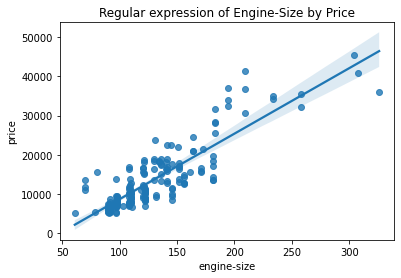

In [39]:
rel = sns.regplot(x = 'engine-size', y = 'price', data = df)
rel.set_title('Regular expression of Engine-Size by Price')

<b> Observation </b> <br>

Plot displays that there is indeed a positive correlation between "Engine-size" and "Price".

Text(0.5, 1.0, 'Regular Expression of Highway-mpg by Price')

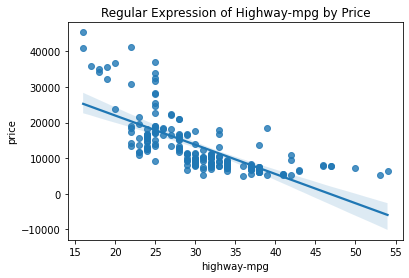

In [40]:
rel = sns.regplot(x = 'highway-mpg', y = 'price', data = df)
rel.set_title("Regular Expression of Highway-mpg by Price")


<b> Observation </b> <br>

Plot displays that there is a negative correlation between "Highway-mpg" and "Price".